# Calculate fugacity and solubility at different temperature and pressure

In [2]:
import sys
sys.path.insert(0, '../src')
from formula import *
import matplotlib.pyplot as plt

EOS_H = pd.read_csv("../EOS_tables/EOS_H.csv")
EOS_He = pd.read_csv("../EOS_tables/EOS_He.csv")
EOS_HHe = pd.read_csv("../EOS_tables/EOS_HHe.csv")

from matplotlib import rc
rc('font',**{'family':'serif','serif':['Times'], 'size': '25'})
rc('text', usetex=True)

import matplotlib.colors as colors
import matplotlib.cbook as cbook
from matplotlib import cm

In [36]:
T_b = 5000    # tempunit in K
P_b = 1e10     # unit in Pa
phi = calc_fugacity_coeff(T_b, P_b, EOS_H, gas="H2")                     # 2.0752834939673606
f = calc_gas_solubility(P_b, T_b, EOS_H, EOS_He, gas='H2')                # (0.0014419785942656627, 1)


In [37]:
print("fucacity is", phi)
print("solubility is", f[0], "and Helium fraction in dissolved gas is", f[1])

fucacity is 30.29895405858791
solubility is 1.3314461115248117 and Helium fraction in dissolved gas is 0


# Calculate the distribution of fugacity within the parameter space we're interested in

TypeError: Length of x must be number of columns in z.

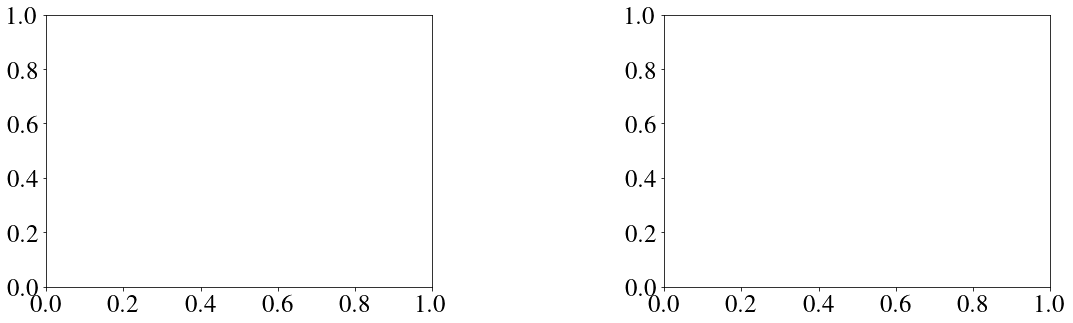

In [98]:
# define the parameter space we need
lower_T, upper_T, num_T = 500, 1e4, 15     # to be 500, 1e4, 15
lower_P, upper_P, num_P = 1e8, 5e10, 36     # to be 1e8, 5e10, 36

P_array = log10_linspace(lower_P, upper_P, num_P)
T_array = log10_linspace(lower_T, upper_T, num_T)

phi_H2 = np.zeros(shape=(P_array.shape[0], T_array.shape[0]))
phi_He = np.zeros(shape=(P_array.shape[0], T_array.shape[0]))

for (i, P) in enumerate(P_array):
    for (j ,T) in enumerate(T_array):
        phi_H2[i, j] = calc_fugacity_coeff(T, P, EOS_H, gas="H2")
        phi_He[i, j] = calc_fugacity_coeff(T, P, EOS_He, gas="He")

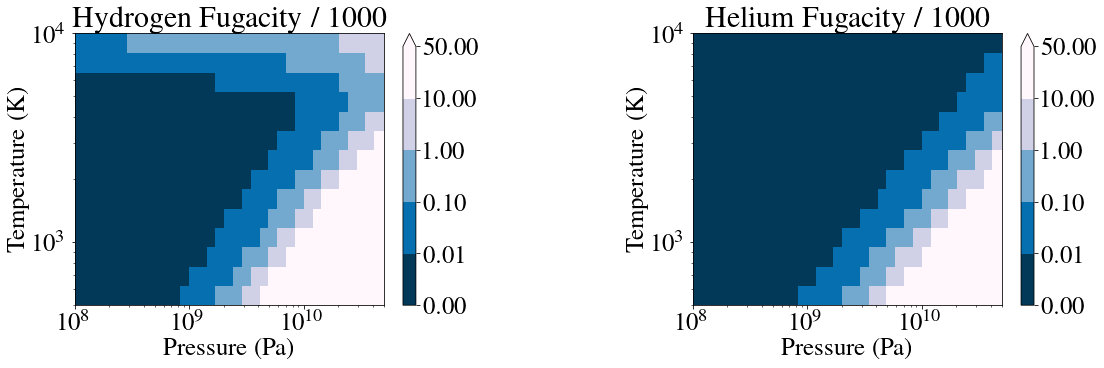

In [146]:
# make a figure to show the fugacity map
fig, axes = plt.subplots(1, 2, figsize=(18,5))
plt.subplots_adjust(wspace=0.6)

bounds = np.array([1e-3, 1e-2, 1e-1, 1, 10, 50])
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
pcm1 = axes[0].pcolormesh(P_array, T_array, phi_H2.T / 1e3, norm=norm, cmap='PuBu_r')
fig.colorbar(pcm1, ax=axes[0], extend='max')
axes[0].set_title("Hydrogen Fugacity / 1000")
axes[0].set_xlabel("Pressure (Pa)")
axes[0].set_ylabel("Temperature (K)")
axes[0].set_xscale('log')
axes[0].set_yscale('log')

pcm2 = axes[1].pcolormesh(P_array, T_array, phi_He.T / 1e3, norm=norm, cmap='PuBu_r')
fig.colorbar(pcm2, ax=axes[1], extend='max')
axes[1].set_title("Helium Fugacity / 1000")
axes[1].set_xlabel("Pressure (Pa)")
axes[1].set_ylabel("Temperature (K)")
axes[1].set_xscale('log')
axes[1].set_yscale('log')

# # save the data for future use
# np.save('../src/data/H2_fugacity.npy', phi_H2, allow_pickle=True)
# np.save('../src/data/He_fugacity.npy', phi_He, allow_pickle=True)

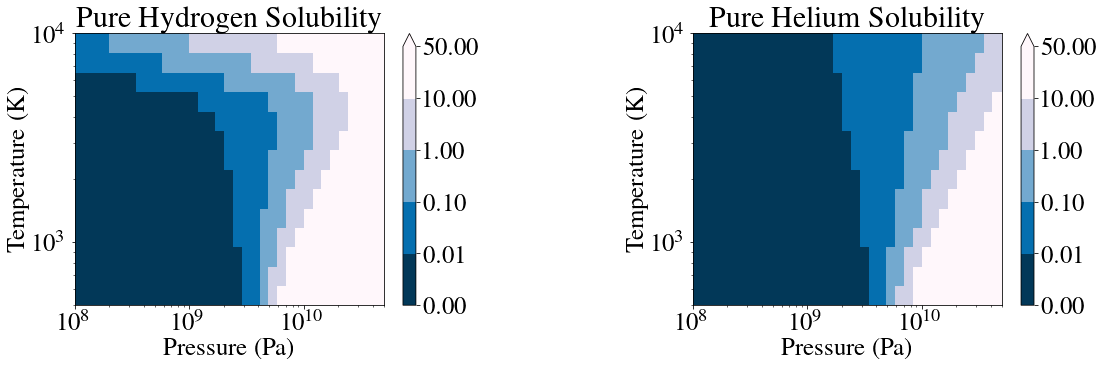

In [143]:
# f_H2 = np.zeros(shape=(P_array.shape[0], T_array.shape[0]))
# f_He = np.zeros(shape=(P_array.shape[0], T_array.shape[0]))

# for (i, P) in enumerate(P_array):
#     for (j ,T) in enumerate(T_array):
#         f_H2[i, j] = 1e-11 * P_array[i] * phi_H2[i, j] * np.exp(-4000 / T_array[j])
#         f_He[i, j] = 1e-11 * P_array[i] * phi_He[i, j] * np.exp(-4000 / T_array[j])
        
# make a figure to show the solubility map
fig, axes = plt.subplots(1, 2, figsize=(18,5))
plt.subplots_adjust(wspace=0.6)

bounds = np.array([1e-3, 1e-2, 1e-1, 1, 10, 50])
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
pcm1 = axes[0].pcolormesh(P_array, T_array, f_H2.T, norm=norm, cmap='PuBu_r')
fig.colorbar(pcm1, ax=axes[0], extend='max')
axes[0].set_title("Pure Hydrogen Solubility")
axes[0].set_xlabel("Pressure (Pa)")
axes[0].set_ylabel("Temperature (K)")
axes[0].set_xscale('log')
axes[0].set_yscale('log')

pcm2 = axes[1].pcolormesh(P_array, T_array, f_He.T, norm=norm, cmap='PuBu_r')
fig.colorbar(pcm2, ax=axes[1], extend='max')
axes[1].set_title("Pure Helium Solubility")
axes[1].set_xlabel("Pressure (Pa)")
axes[1].set_ylabel("Temperature (K)")
axes[1].set_xscale('log')
axes[1].set_yscale('log')

In [124]:
import matplotlib.colors as colors
import matplotlib.cbook as cbook
from matplotlib import cm

In [115]:

np.save('../src/data/H2_fugacity.npy', phi_H2, allow_pickle=True)
np.save('../src/data/He_fugacity.npy', phi_He, allow_pickle=True)

In [141]:
phi_H2.min()

1.026659034171311